[*] Generating RSA key pair...
[*] Generating AES key...
[*] Encrypting AES key with RSA public key...
[*] Decrypting AES key with RSA private key...
[*] Encrypting message using AES...
[*] Decrypting message using AES...

[*] Original Message: Hello Arjav, your message is secure! 🔐
[*] Encrypted Message (base64): hGyrzlwU/v1F/7zu1vpi6s5JJJBtczlmKp7CDoKjCQdQVXWMejyBQio=
[*] Decrypted Message: Hello Arjav, your message is secure! 🔐
[*] Generating encryption diagram...
[+] Diagram saved as encryption_flow.png


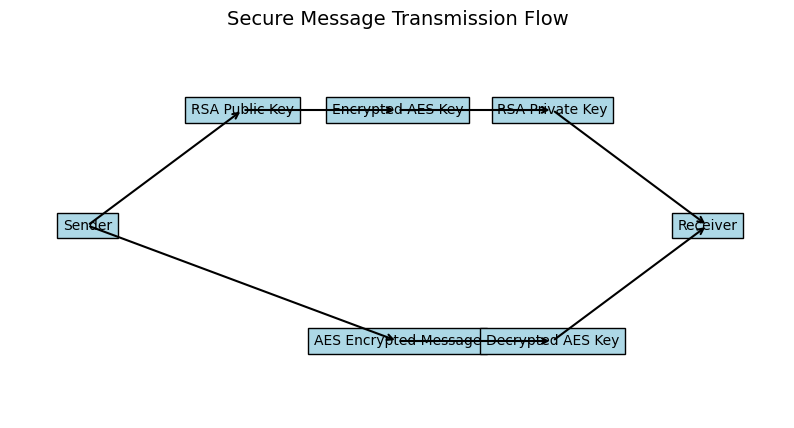

In [1]:
import os
import base64
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC


# Step 1: Generate RSA Keys (Asymmetric)
def generate_rsa_keys():
    print("[*] Generating RSA key pair...")
    private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
    public_key = private_key.public_key()
    return private_key, public_key


# Step 2: Generate AES Key (Symmetric)
def generate_aes_key():
    print("[*] Generating AES key...")
    key = os.urandom(32)  # AES-256
    iv = os.urandom(16)   # Initialization Vector
    return key, iv


# Step 3: Encrypt AES Key using RSA Public Key
def encrypt_aes_key_rsa(aes_key, public_key):
    print("[*] Encrypting AES key with RSA public key...")
    encrypted_key = public_key.encrypt(
        aes_key,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    return encrypted_key


# Step 4: Decrypt AES Key using RSA Private Key
def decrypt_aes_key_rsa(encrypted_key, private_key):
    print("[*] Decrypting AES key with RSA private key...")
    decrypted_key = private_key.decrypt(
        encrypted_key,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    return decrypted_key


# Step 5: Encrypt Message using AES
def encrypt_message(message, aes_key, iv):
    print("[*] Encrypting message using AES...")
    cipher = Cipher(algorithms.AES(aes_key), modes.CFB(iv))
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(message.encode()) + encryptor.finalize()
    return ciphertext


# Step 6: Decrypt Message using AES
def decrypt_message(ciphertext, aes_key, iv):
    print("[*] Decrypting message using AES...")
    cipher = Cipher(algorithms.AES(aes_key), modes.CFB(iv))
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext.decode()


# Step 7: Visualization of Key Exchange
def visualize_encryption():
    print("[*] Generating encryption diagram...")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off')
    ax.set_title('Secure Message Transmission Flow', fontsize=14)

    items = [
        ("Sender", (0.1, 0.5)),
        ("RSA Public Key", (0.3, 0.8)),
        ("Encrypted AES Key", (0.5, 0.8)),
        ("AES Encrypted Message", (0.5, 0.2)),
        ("Receiver", (0.9, 0.5)),
        ("RSA Private Key", (0.7, 0.8)),
        ("Decrypted AES Key", (0.7, 0.2)),
    ]

    for text, pos in items:
        ax.text(*pos, text, bbox=dict(facecolor='lightblue', edgecolor='black'), ha='center', va='center', fontsize=10)

    connections = [
        ((0.1, 0.5), (0.3, 0.8)),
        ((0.3, 0.8), (0.5, 0.8)),
        ((0.1, 0.5), (0.5, 0.2)),
        ((0.5, 0.8), (0.7, 0.8)),
        ((0.5, 0.2), (0.7, 0.2)),
        ((0.7, 0.8), (0.9, 0.5)),
        ((0.7, 0.2), (0.9, 0.5)),
    ]

    for start, end in connections:
        ax.annotate("", xy=end, xytext=start,
                    arrowprops=dict(arrowstyle="->", lw=1.5))

    plt.savefig("encryption_flow.png")
    print("[+] Diagram saved as encryption_flow.png")
    plt.show()


# 🔁 Run the Secure Communication Demo
def secure_communication_demo():
    message = "Hello Arjav, your message is secure! 🔐"

    # Generate RSA Keys
    private_key, public_key = generate_rsa_keys()

    # Generate AES Key
    aes_key, iv = generate_aes_key()

    # Encrypt AES Key with RSA
    encrypted_aes_key = encrypt_aes_key_rsa(aes_key, public_key)

    # Decrypt AES Key
    decrypted_aes_key = decrypt_aes_key_rsa(encrypted_aes_key, private_key)

    # Encrypt Message
    ciphertext = encrypt_message(message, aes_key, iv)

    # Decrypt Message
    decrypted_message = decrypt_message(ciphertext, decrypted_aes_key, iv)

    # Display Results
    print("\n[*] Original Message:", message)
    print("[*] Encrypted Message (base64):", base64.b64encode(ciphertext).decode())
    print("[*] Decrypted Message:", decrypted_message)

    # Visualize Flow
    visualize_encryption()


if __name__ == "__main__":
    secure_communication_demo()


In [7]:
import os
import tkinter as tk
from tkinter import messagebox, filedialog
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import base64
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import io

class CryptoApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Secure Message Transmission")
        self.root.geometry("800x600")
        
        # Generate keys on startup
        self.aes_key = None
        self.rsa_private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048,
            backend=default_backend()
        )
        self.rsa_public_key = self.rsa_private_key.public_key()
        
        # GUI Elements
        self.create_widgets()
        
        # For saving screenshots
        self.screenshot_count = 1
        os.makedirs("screenshots", exist_ok=True)
    
    def create_widgets(self):
        # Key Generation Section
        key_frame = tk.LabelFrame(self.root, text="Key Management", padx=10, pady=10)
        key_frame.pack(pady=10, padx=10, fill="x")
        
        tk.Button(key_frame, text="Generate AES Key", command=self.generate_aes_key).pack(side="left", padx=5)
        tk.Button(key_frame, text="Show RSA Keys", command=self.show_rsa_keys).pack(side="left", padx=5)
        tk.Button(key_frame, text="Save Screenshot", command=self.save_screenshot).pack(side="right", padx=5)
        
        # Encryption Section
        encrypt_frame = tk.LabelFrame(self.root, text="Encryption", padx=10, pady=10)
        encrypt_frame.pack(pady=10, padx=10, fill="x")
        
        self.message_entry = tk.Entry(encrypt_frame, width=50)
        self.message_entry.pack(pady=5)
        tk.Button(encrypt_frame, text="Encrypt Message", command=self.encrypt_message).pack(pady=5)
        
        # Decryption Section
        decrypt_frame = tk.LabelFrame(self.root, text="Decryption", padx=10, pady=10)
        decrypt_frame.pack(pady=10, padx=10, fill="x")
        
        self.ciphertext_entry = tk.Entry(decrypt_frame, width=50)
        self.ciphertext_entry.pack(pady=5)
        tk.Button(decrypt_frame, text="Decrypt Message", command=self.decrypt_message).pack(pady=5)
        
        # Output Section
        output_frame = tk.LabelFrame(self.root, text="Output", padx=10, pady=10)
        output_frame.pack(pady=10, padx=10, fill="both", expand=True)
        
        self.output_text = tk.Text(output_frame, height=10)
        self.output_text.pack(fill="both", expand=True)
        
        # Terminal Output Section
        terminal_frame = tk.LabelFrame(self.root, text="Terminal Output", padx=10, pady=10)
        terminal_frame.pack(pady=10, padx=10, fill="both", expand=True)
        
        self.terminal_text = tk.Text(terminal_frame, height=10, bg="black", fg="white")
        self.terminal_text.pack(fill="both", expand=True)
        
        # Add some initial terminal output
        self.add_terminal_output("System initialized. RSA keys generated automatically.")
        self.add_terminal_output("Please generate an AES key to begin.")
    
    def generate_aes_key(self):
        # Generate a random 256-bit AES key
        self.aes_key = os.urandom(32)
        
        # Encrypt the AES key with RSA public key for secure transmission
        encrypted_aes_key = self.rsa_public_key.encrypt(
            self.aes_key,
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )
        
        self.add_output(f"AES Key Generated: {base64.b64encode(self.aes_key).decode()}")
        self.add_output(f"RSA-Encrypted AES Key: {base64.b64encode(encrypted_aes_key).decode()}")
        self.add_terminal_output("AES key generated and encrypted with RSA public key.")
        
        # Create a visualization of the key generation
        self.create_key_generation_image()
    
    def show_rsa_keys(self):
        private_key_pem = self.rsa_private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ).decode()
        
        public_key_pem = self.rsa_public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        ).decode()
        
        self.add_output("=== RSA Private Key ===")
        self.add_output(private_key_pem)
        self.add_output("=== RSA Public Key ===")
        self.add_output(public_key_pem)
        
        self.add_terminal_output("RSA keys displayed in output.")
    
    def encrypt_message(self):
        if not self.aes_key:
            messagebox.showerror("Error", "Please generate an AES key first")
            return
            
        message = self.message_entry.get()
        if not message:
            messagebox.showerror("Error", "Please enter a message to encrypt")
            return
            
        try:
            # Generate a random IV
            iv = os.urandom(16)
            
            # Encrypt the message
            cipher = Cipher(algorithms.AES(self.aes_key), modes.CBC(iv), backend=default_backend())
            encryptor = cipher.encryptor()
            padded_message = self._pad_message(message.encode())
            ciphertext = encryptor.update(padded_message) + encryptor.finalize()
            
            # Combine IV and ciphertext
            encrypted_data = iv + ciphertext
            
            # Base64 encode for display
            encrypted_b64 = base64.b64encode(encrypted_data).decode()
            
            self.ciphertext_entry.delete(0, tk.END)
            self.ciphertext_entry.insert(0, encrypted_b64)
            
            self.add_output(f"Encrypted Message: {encrypted_b64}")
            self.add_terminal_output(f"Message encrypted: {message[:20]}...")
            
            # Create a visualization of the encryption
            self.create_encryption_image(message, encrypted_b64)
            
        except Exception as e:
            messagebox.showerror("Error", f"Encryption failed: {str(e)}")
    
    def decrypt_message(self):
        if not self.aes_key:
            messagebox.showerror("Error", "Please generate an AES key first")
            return
            
        encrypted_b64 = self.ciphertext_entry.get()
        if not encrypted_b64:
            messagebox.showerror("Error", "Please enter ciphertext to decrypt")
            return
            
        try:
            encrypted_data = base64.b64decode(encrypted_b64)
            iv = encrypted_data[:16]
            ciphertext = encrypted_data[16:]
            
            # Decrypt the message
            cipher = Cipher(algorithms.AES(self.aes_key), modes.CBC(iv), backend=default_backend())
            decryptor = cipher.decryptor()
            decrypted_padded = decryptor.update(ciphertext) + decryptor.finalize()
            decrypted_message = self._unpad_message(decrypted_padded).decode()
            
            self.add_output(f"Decrypted Message: {decrypted_message}")
            self.add_terminal_output(f"Message decrypted: {decrypted_message[:20]}...")
            
            # Create a visualization of the decryption
            self.create_decryption_image(encrypted_b64, decrypted_message)
            
        except Exception as e:
            messagebox.showerror("Error", f"Decryption failed: {str(e)}")
    
    def _pad_message(self, message):
        block_size = algorithms.AES.block_size // 8
        padding_length = block_size - (len(message) % block_size)
        padding = bytes([padding_length]) * padding_length
        return message + padding
    
    def _unpad_message(self, padded_message):
        padding_length = padded_message[-1]
        return padded_message[:-padding_length]
    
    def add_output(self, text):
        self.output_text.insert(tk.END, text + "\n")
        self.output_text.see(tk.END)
    
    def add_terminal_output(self, text):
        self.terminal_text.insert(tk.END, "> " + text + "\n")
        self.terminal_text.see(tk.END)
    
    def save_screenshot(self):
        try:
            # Save the entire window
            x = self.root.winfo_rootx()
            y = self.root.winfo_rooty()
            width = self.root.winfo_width()
            height = self.root.winfo_height()
            
            from PIL import ImageGrab
            img = ImageGrab.grab(bbox=(x, y, x+width, y+height))
            
            filename = f"screenshots/screenshot_{self.screenshot_count}.png"
            img.save(filename)
            self.add_terminal_output(f"Screenshot saved as {filename}")
            self.screenshot_count += 1
            
            return filename
        except Exception as e:
            messagebox.showerror("Error", f"Failed to save screenshot: {str(e)}")
            return None
    
    def create_key_generation_image(self):
        plt.figure(figsize=(8, 4))
        plt.title("Key Generation Process")
        
        # Create a visual representation
        plt.barh(["AES Key", "RSA Public Key", "RSA Private Key"], [256, 2048, 2048])
        plt.xlabel("Key Size (bits)")
        plt.ylabel("Key Type")
        plt.grid(axis="x")
        
        # Save to buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        
        # Display in GUI
        img = Image.open(buf)
        img = img.resize((400, 200), Image.LANCZOS)
        img_tk = ImageTk.PhotoImage(img)
        
        # Create a new window to display
        key_window = tk.Toplevel(self.root)
        key_window.title("Key Generation Visualization")
        label = tk.Label(key_window, image=img_tk)
        label.image = img_tk
        label.pack()
        
        plt.close()
        
        return buf
    
    def create_encryption_image(self, plaintext, ciphertext):
        plt.figure(figsize=(10, 5))
        plt.suptitle("Encryption Process")
        
        plt.subplot(1, 2, 1)
        plt.title("Plaintext")
        plt.text(0.1, 0.5, plaintext, fontsize=10)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title("Ciphertext")
        plt.text(0.1, 0.5, ciphertext[:50] + "..." if len(ciphertext) > 50 else ciphertext, fontsize=8)
        plt.axis('off')
        
        # Save to buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        
        # Display in GUI
        img = Image.open(buf)
        img = img.resize((600, 300), Image.LANCZOS)
        img_tk = ImageTk.PhotoImage(img)
        
        # Create a new window to display
        enc_window = tk.Toplevel(self.root)
        enc_window.title("Encryption Visualization")
        label = tk.Label(enc_window, image=img_tk)
        label.image = img_tk
        label.pack()
        
        plt.close()
        
        return buf
    
    def create_decryption_image(self, ciphertext, plaintext):
        plt.figure(figsize=(10, 5))
        plt.suptitle("Decryption Process")
        
        plt.subplot(1, 2, 1)
        plt.title("Ciphertext")
        plt.text(0.1, 0.5, ciphertext[:50] + "..." if len(ciphertext) > 50 else ciphertext, fontsize=8)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title("Decrypted Plaintext")
        plt.text(0.1, 0.5, plaintext, fontsize=10)
        plt.axis('off')
        
        # Save to buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        
        # Display in GUI
        img = Image.open(buf)
        img = img.resize((600, 300), Image.LANCZOS)
        img_tk = ImageTk.PhotoImage(img)
        
        # Create a new window to display
        dec_window = tk.Toplevel(self.root)
        dec_window.title("Decryption Visualization")
        label = tk.Label(dec_window, image=img_tk)
        label.image = img_tk
        label.pack()
        
        plt.close()
        
        return buf

if __name__ == "__main__":
    from cryptography.hazmat.primitives import serialization
    
    root = tk.Tk()
    app = CryptoApp(root)
    root.mainloop()

print(f"Screenshots saved at: {os.path.abspath('screenshots')}")


C:\Users\pawan\AppData\Local\Temp\ipykernel_12180\143350172.py:273: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png')
C:\Users\pawan\AppData\Local\Temp\ipykernel_12180\143350172.py:308: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png')


Screenshots saved at: C:\Users\pawan\screenshots
